In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
from decimal import Decimal

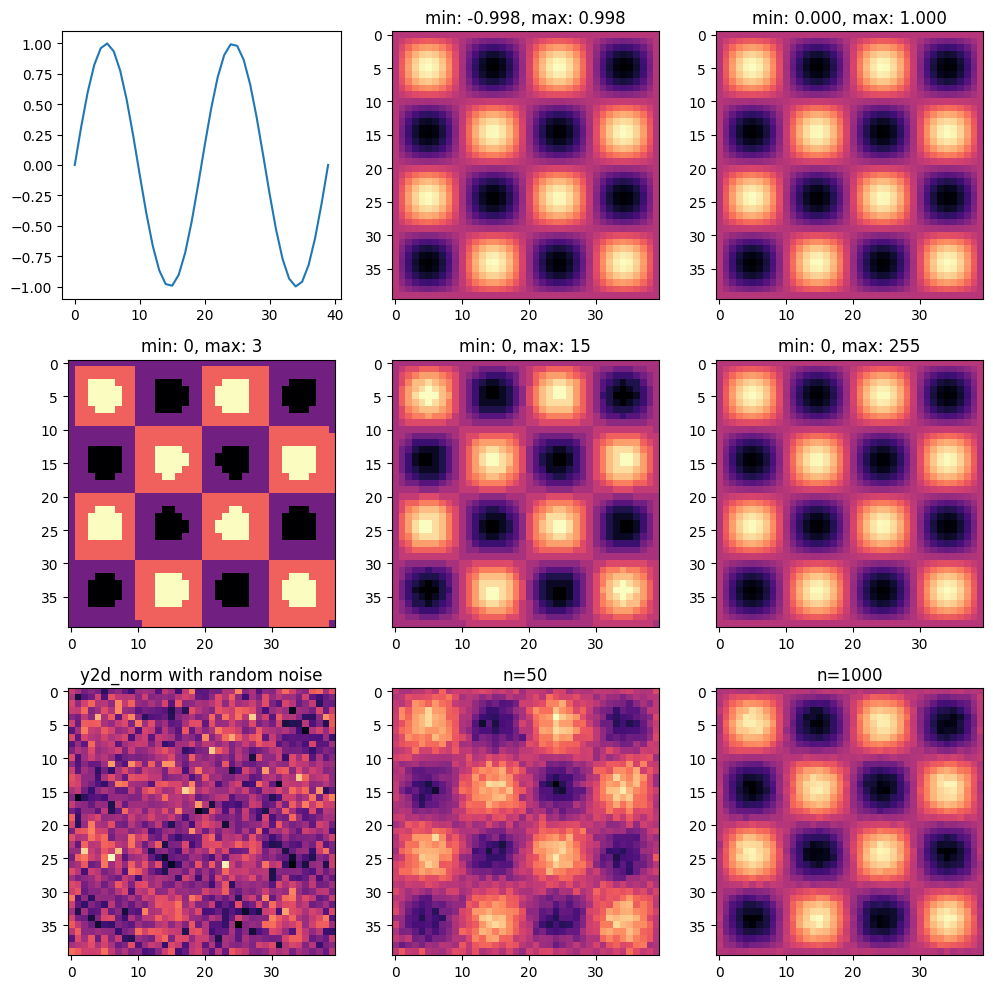

In [49]:
fig, ax = plt.subplots(3, 3, figsize=(10,10))

#   ZAD 1
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -

x = np.linspace(0, 4*math.pi, num=40)
y = np.sin(x)

ax[0,0].plot(y)

y2d = y[:, np.newaxis]*y[np.newaxis, :]
ax[0,1].imshow(y2d, cmap=('magma'))
ax[0,1].set_title(f'min: {round(Decimal(np.min(y2d)), 3)}, max: {round(Decimal(np.max(y2d)), 3)}')

y2d_norm = (y2d - np.min(y2d))/(np.max(y2d) - np.min(y2d))
ax[0,2].imshow(y2d_norm, cmap=('magma'))
ax[0,2].set_title(f'min: {round(Decimal(np.min(y2d_norm)), 3)}, max: {round(Decimal(np.max(y2d_norm)), 3)}')


#   ZAD 2
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -


L2bit = pow(2, 2) - 1
L4bit = pow(2, 4) - 1
L8bit = pow(2, 8) - 1

y2bit = np.rint(L2bit * y2d_norm)
ax[1,0].imshow(y2bit, cmap='magma')
ax[1,0].set_title(f'min: {int(round(Decimal(np.min(y2bit)), 3))}, max: {int(round(Decimal(np.max(y2bit)), 3))}')

y4bit = np.rint(L4bit * y2d_norm)
ax[1,1].imshow(y4bit, cmap='magma')
ax[1,1].set_title(f'min: {int(round(Decimal(np.min(y4bit)), 3))}, max: {int(round(Decimal(np.max(y4bit)), 3))}')

y8bit = np.rint(L8bit * y2d_norm)
ax[1,2].imshow(y8bit, cmap='magma')
ax[1,2].set_title(f'min: {int(round(Decimal(np.min(y8bit)), 3))}, max: {int(round(Decimal(np.max(y8bit)), 3))}')



#   ZAD 3
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -


noise = np.random.normal(y2d_norm)
y2d_norm_with_noise = y2d_norm + noise

ax[2,0].imshow(y2d_norm_with_noise, cmap='magma')
ax[2,0].set_title('y2d_norm with random noise')

images_50_acquisitions = [np.random.normal(y2d_norm)+y2d_norm for _ in range(50)]
images_1000_acquisitions = [np.random.normal(y2d_norm)+y2d_norm for _ in range(1000)]

without_noise_50 = np.mean(images_50_acquisitions, axis=0)
without_noise_1000 = np.mean(images_1000_acquisitions, axis=0)

ax[2,1].imshow(without_noise_50, cmap='magma')
ax[2,1].set_title('n=50')

ax[2,2].imshow(without_noise_1000, cmap='magma')
ax[2,2].set_title('n=1000')


# - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>